### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!


#### Table of Contents

- [Data Collection](#collections)
- [Question 1](#question1)
- [Question 2](#question2)
- [Question 3](#question3)

<a id='collection'></a>
### Data Collection and Cleaning

In [21]:
install.packages('ggplot2')
install.packages('anytime')
install.packages('dplyr')


The downloaded binary packages are in
	/var/folders/6j/wn6gs09j6lsf6xwddrzy_srr0000gn/T//RtmpvrO012/downloaded_packages

The downloaded binary packages are in
	/var/folders/6j/wn6gs09j6lsf6xwddrzy_srr0000gn/T//RtmpvrO012/downloaded_packages

The downloaded binary packages are in
	/var/folders/6j/wn6gs09j6lsf6xwddrzy_srr0000gn/T//RtmpvrO012/downloaded_packages


In [47]:
library(dplyr)

In [48]:
library(ggplot2)

In [49]:
library(anytime)

In [50]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [51]:
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [52]:
summary(ny)

       X            Start.Time          End.Time         Trip.Duration      
 Min.   :     47   Length:54770       Length:54770       Min.   :     61.0  
 1st Qu.:1712425   Class :character   Class :character   1st Qu.:    368.0  
 Median :3418634   Mode  :character   Mode  :character   Median :    610.0  
 Mean   :3415873                                         Mean   :    903.6  
 3rd Qu.:5123382                                         3rd Qu.:   1051.0  
 Max.   :6816152                                         Max.   :1088634.0  
                                                         NA's   :1          
 Start.Station      End.Station         User.Type            Gender         
 Length:54770       Length:54770       Length:54770       Length:54770      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [53]:
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [54]:
summary(wash)

       X            Start.Time          End.Time         Trip.Duration     
 Min.   :      7   Length:89051       Length:89051       Min.   :    60.3  
 1st Qu.: 434587   Class :character   Class :character   1st Qu.:   410.9  
 Median : 872858   Mode  :character   Mode  :character   Median :   707.0  
 Mean   : 873881                                         Mean   :  1234.0  
 3rd Qu.:1313305                                         3rd Qu.:  1233.2  
 Max.   :1751392                                         Max.   :904591.4  
                                                         NA's   :1         
 Start.Station      End.Station         User.Type        
 Length:89051       Length:89051       Length:89051      
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                            

In [55]:
summary(chi)

       X            Start.Time          End.Time         Trip.Duration    
 Min.   :     36   Length:8630        Length:8630        Min.   :   60.0  
 1st Qu.: 386722   Class :character   Class :character   1st Qu.:  394.2  
 Median : 773554   Mode  :character   Mode  :character   Median :  670.0  
 Mean   : 776721                                         Mean   :  937.2  
 3rd Qu.:1171266                                         3rd Qu.: 1119.0  
 Max.   :1551248                                         Max.   :85408.0  
                                                                          
 Start.Station      End.Station         User.Type            Gender         
 Length:8630        Length:8630        Length:8630        Length:8630       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

In [56]:
# adding Gender and Birth Year columns for consitency in column count
wash$Gender <- NA
wash$Birth.Year <- NA

In [57]:
# adding City column to differentiate once tables are joined

ny$City <- 'New York'
wash$City <- 'Washington D.C.'
chi$City <- 'Chicago'

In [58]:
correctDates <- function(df_) {
    # Converting start.time and end.time datatypes
    
    df_$Start.Time <- anytime(df_$Start.Time)
    df_$End.Time <- anytime(df_$End.Time)
    df_
}

wash <- correctDates(wash)
chi <- correctDates(chi)
ny <- correctDates(ny)

In [59]:
concat_all <- function(d1, d2) {
    return(rbind(d1, d2))
}

city_data <- concat_all(ny, wash)
city_data <- concat_all(city_data, chi)
head(city_data)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [60]:
str(city_data)

'data.frame':	152451 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : POSIXct, format: "2017-06-11 14:55:05" "2017-05-11 15:30:11" ...
 $ End.Time     : POSIXct, format: "2017-06-11 15:08:21" "2017-05-11 15:41:43" ...
 $ Trip.Duration: num  795 692 1325 703 329 ...
 $ Start.Station: chr  "Suffolk St & Stanton St" "Lexington Ave & E 63 St" "1 Pl & Clinton St" "Barrow St & Hudson St" ...
 $ End.Station  : chr  "W Broadway & Spring St" "1 Ave & E 78 St" "Henry St & Degraw St" "W 20 St & 8 Ave" ...
 $ User.Type    : chr  "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...
 $ Gender       : chr  "Male" "Male" "Male" "Female" ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...
 $ City         : chr  "New York" "New York" "New York" "New York" ...


In [61]:
summary(city_data)

       X             Start.Time                     End.Time                  
 Min.   :      7   Min.   :2017-01-01 00:11:00   Min.   :1400-01-20 00:00:04  
 1st Qu.: 589310   1st Qu.:2017-03-07 08:12:40   1st Qu.:2017-03-07 08:25:47  
 Median :1184899   Median :2017-04-23 05:19:09   Median :2017-04-23 05:19:21  
 Mean   :1781625   Mean   :2017-04-17 05:55:35   Mean   :2017-04-15 18:38:55  
 3rd Qu.:2085970   3rd Qu.:2017-05-31 05:29:56   3rd Qu.:2017-05-31 05:36:10  
 Max.   :6816152   Max.   :2017-06-30 23:52:44   Max.   :2017-07-01 12:12:56  
                   NA's   :1                     NA's   :1                    
 Trip.Duration     Start.Station      End.Station         User.Type        
 Min.   :     60   Length:152451      Length:152451      Length:152451     
 1st Qu.:    392   Class :character   Class :character   Class :character  
 Median :    667   Mode  :character   Mode  :character   Mode  :character  
 Mean   :   1098                                                

In [62]:
# Filtering the rows that have no user type

city_data = filter(city_data, User.Type == "Customer" | User.Type == "Subscriber")

<a id='question1'></a>
### Question 1 - Which user type participates more and when do they?


I want to firstly look at the types of users taking advantage of this service. It is broken down by Subscriber and Customer. My assumption is that returning subscribers are using the bikeshare service more, but that there is also a solid contingent of ad hoc customers.

In [63]:
table(city_data$City)


        Chicago        New York Washington D.C. 
           8629           54651           89050 

In [64]:
table(city_data$User.Type)


  Customer Subscriber 
     30754     121576 

In [67]:
# Create weekday field.
city_data$Weekday <- strftime(city_data$Start.Time, format="%A")

In [68]:
head(city_data)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Weekday
,<int>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York,Sunday
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York,Thursday
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York,Wednesday
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York,Monday
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York,Wednesday
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York,Wednesday


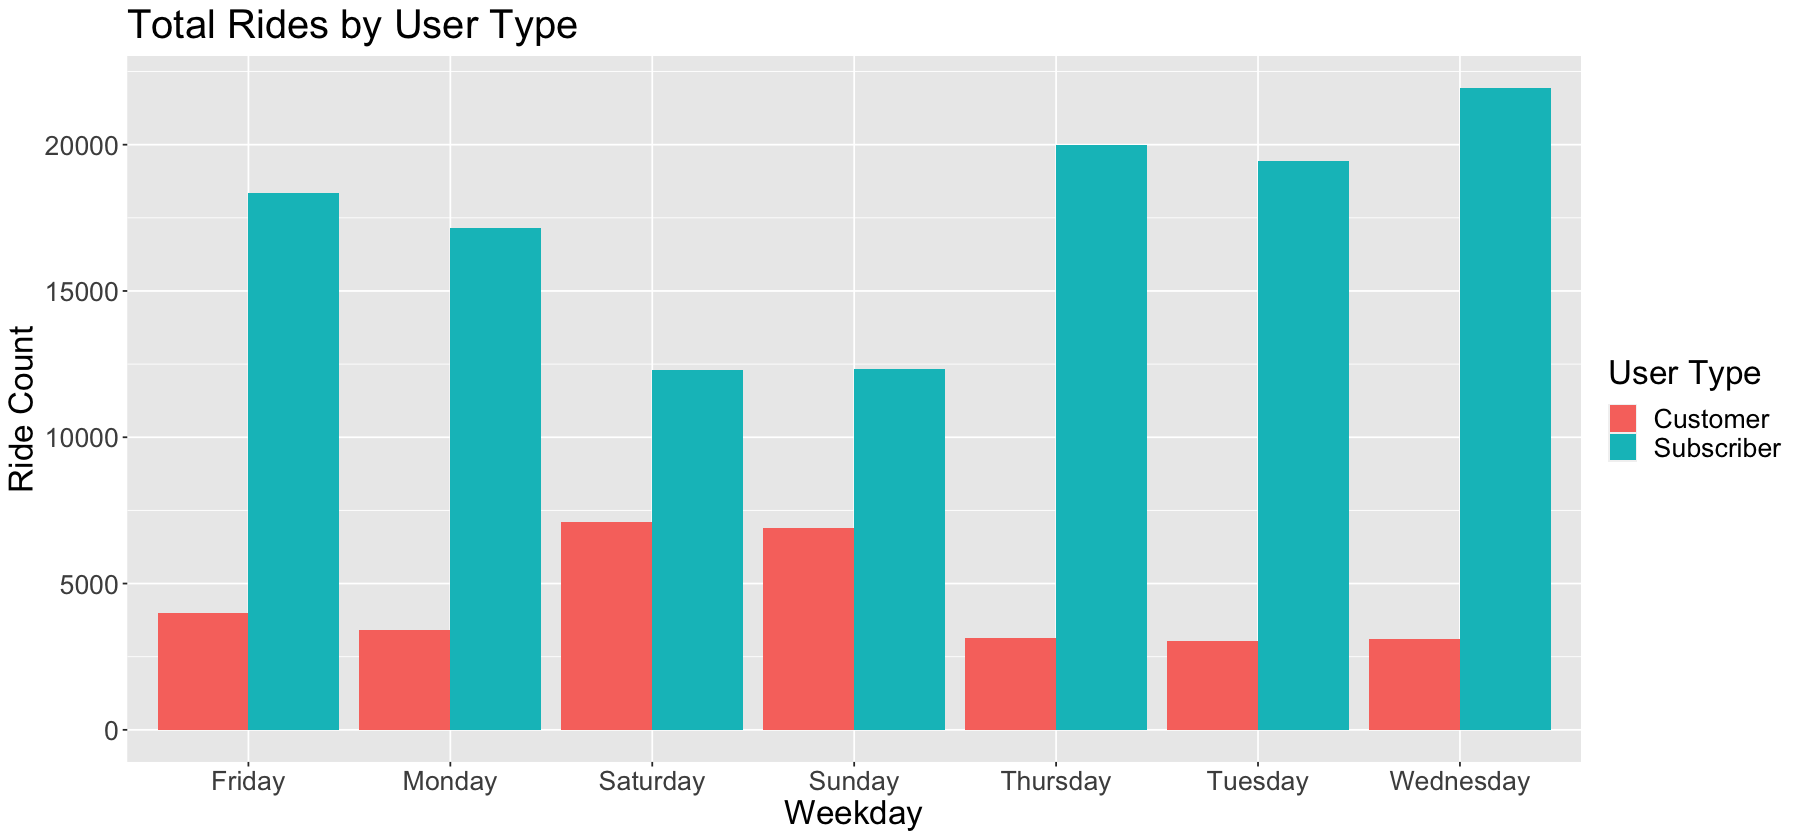

In [107]:
options(repr.plot.width=15, repr.plot.height=7)
library(anytime)

ggplot(aes(x = Weekday, fill = User.Type), data=city_data) +
    geom_bar(position='dodge') +
    scale_fill_hue(name = "User Type",
                   labels=c("Customer", "Subscriber")) +
    theme(text = element_text(size = 20)) +
    xlab("Weekday") +
    ylab("Ride Count") +
    ggtitle("Total Rides by User Type")

This graph raised an interesting point. The subscriber data looks to peak on Wednesdays and appear like a normal distribution histogram (if the days were ordered correctly), tapering to each end from the center. Contrary to that, the Customer bars are lower mid-week and increase on teh weekends. Our assumption here could be that people who use bikeshare subscriptions are sharing for work, commuting to and from a destination. The ad-hoc users are then more likely to be visitors to the city, or people out on the weekends for an adventure.

Let's look at what time of day the subscribers are utilizing the bikeshare program.

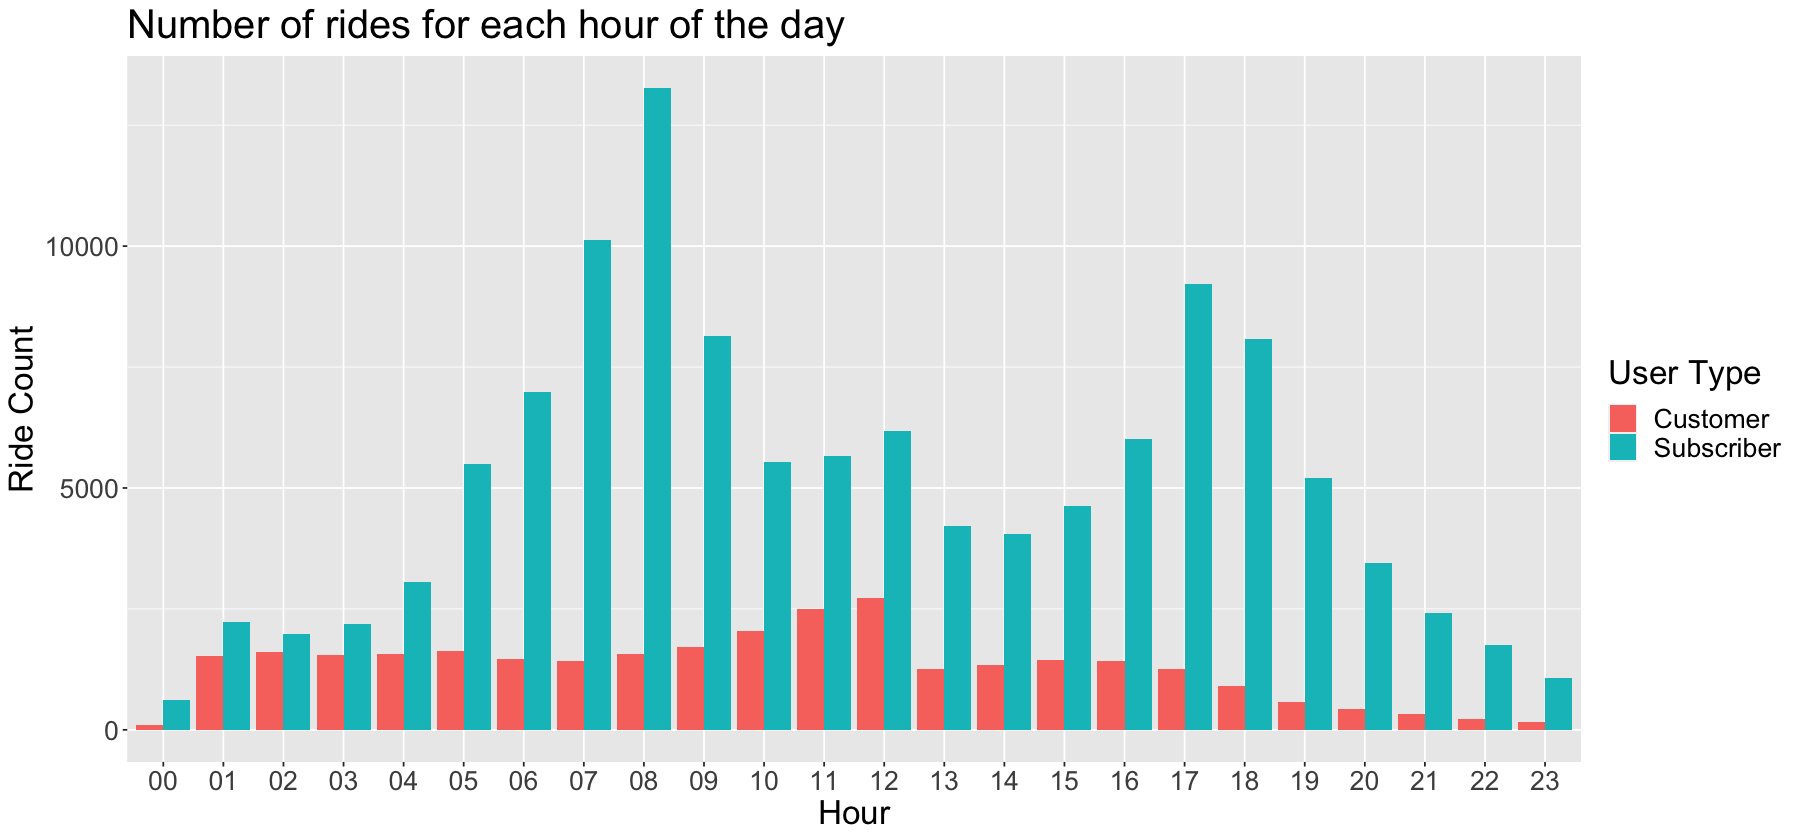

In [72]:
# Looking at the hour of day that routes are started

city_data$Hour <- strftime(city_data$Start.Time, format="%H")

ggplot(aes(x=Hour, fill=User.Type), data=city_data) +
    geom_bar(position='dodge') +
    scale_fill_hue(name = "User Type",
                   labels=c("Customer", "Subscriber")) +
    theme(text = element_text(size = 20)) +
    ylab("Ride Count") +
    ggtitle("Number of rides for each hour of the day")

This chart appears to confirm our assumption that Subscribers tend to use the bikeshare for commuting. The peak hours are between 7-9 AM and then again between 5-6 PM. The Customer trend is much flatter, spread out across the day.

<a id='question2'></a>
### Question 2 - Which city has the longest average trip duration?

Now that we have looked at the user types in the bikeshare, I think we should find out what the ride durations look like in each city. 

In [89]:
# filtering outliers from the dataset

city_data = filter(city_data, Trip.Duration <= 50000)

In [90]:
summary(city_data$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   392.0   666.4  1025.8  1157.0 49979.5 

In [91]:
# Full user count per city

table(city_data$City)


        Chicago        New York Washington D.C. 
           8628           54626           88998 

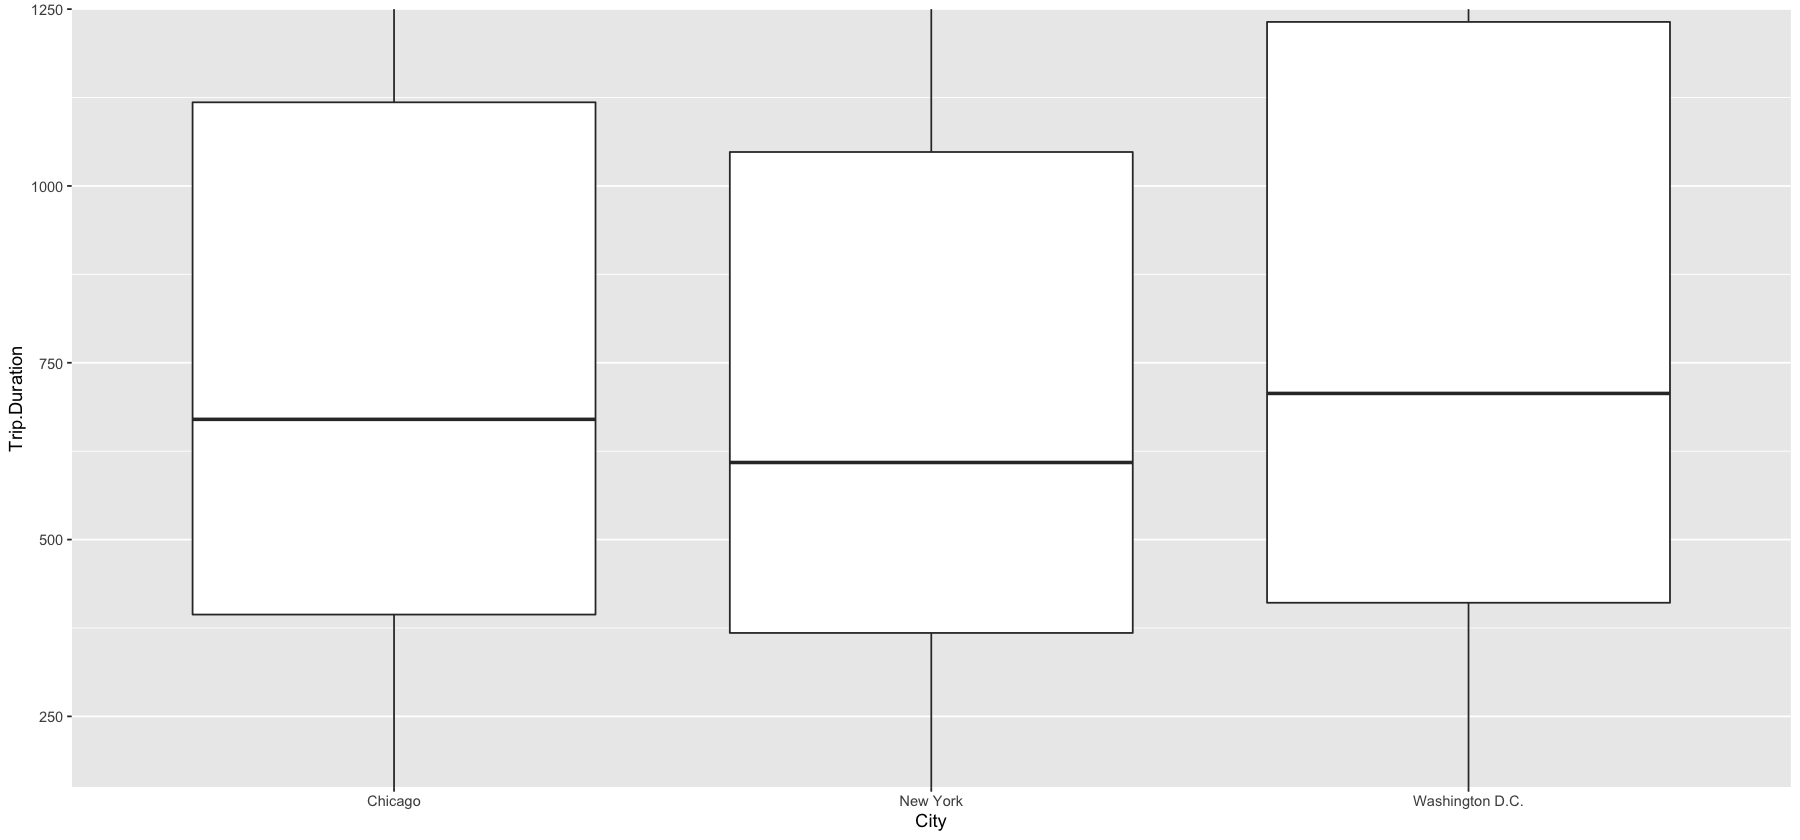

In [95]:
qplot(x = City, y = Trip.Duration, data = city_data, geom = 'boxplot')+
coord_cartesian(ylim = c(200, 1200))

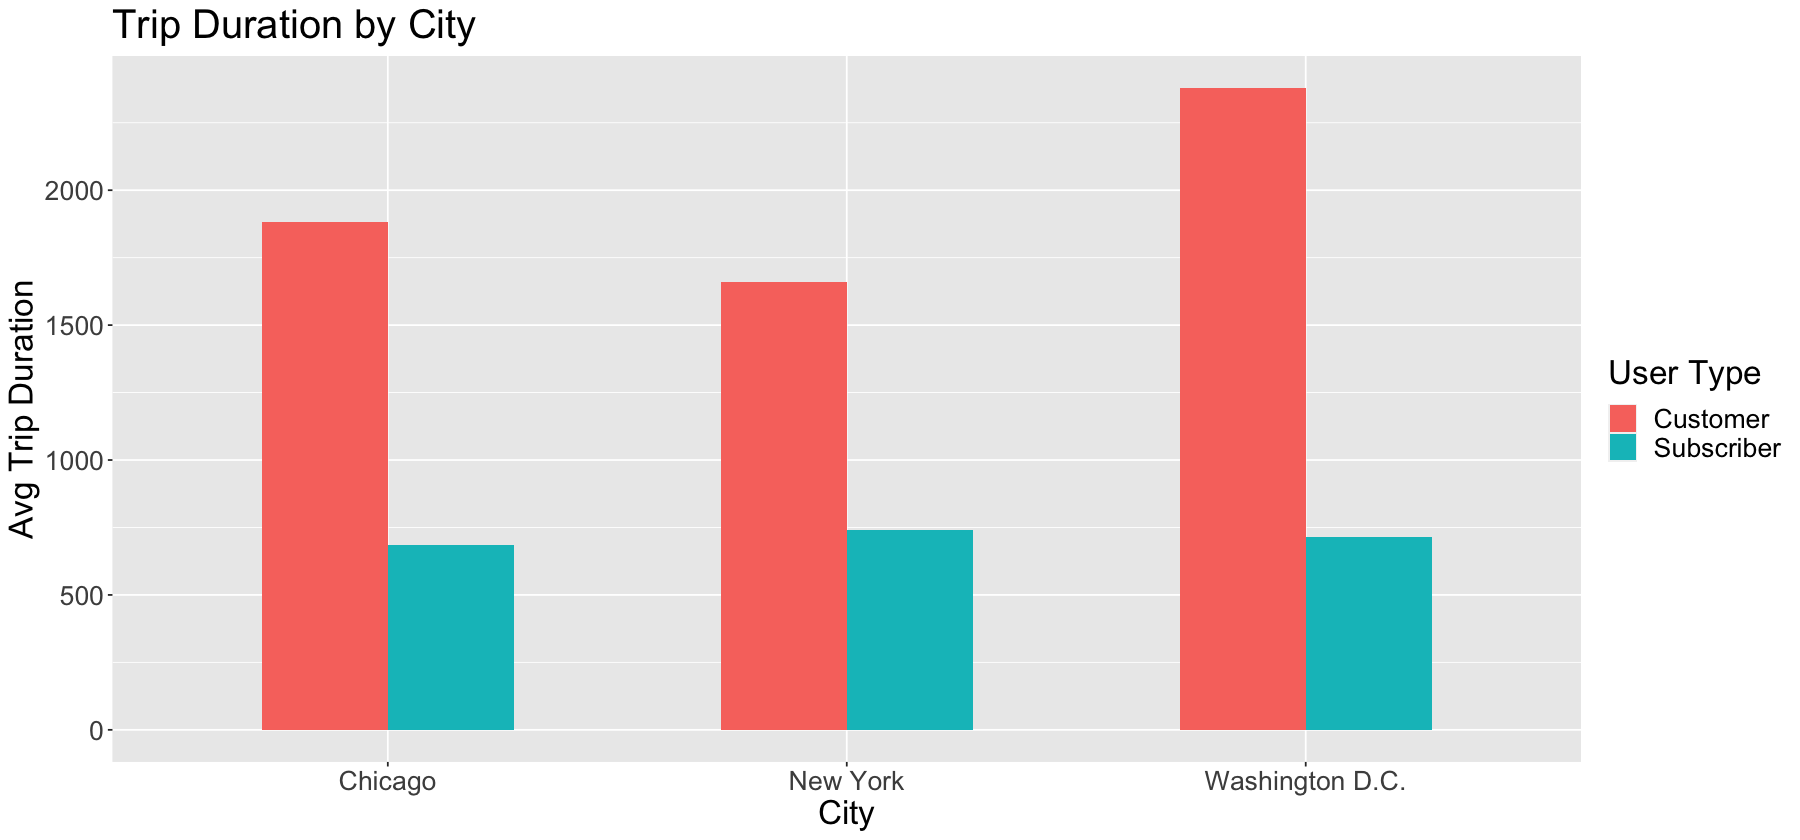

In [96]:
# Looking at mean trip duration by city

ggplot(aes(x=City, y=Trip.Duration, fill=User.Type), data=city_data) +
    geom_bar(position='dodge', stat = "summary", fun = mean, width = .55) +
    scale_fill_hue(name = "User Type", labels=c("Customer", "Subscriber")) +
    theme(text = element_text(size = 20)) +
    ylab("Avg Trip Duration") +
    ggtitle("Trip Duration by City")


In [97]:
trip.summary <- with(city_data, aggregate(list(Trip.Duration), by = list(City), 
                   FUN = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(trip.summary) <- c('City', 'Trip.Duration')
trip.summary[,'Trip.Duration']=round(trip.summary[,'Trip.Duration'],2)
trip.summary

City,Trip.Duration
<chr>,<dbl>
Chicago,927.14
New York,832.55
Washington D.C.,1153.94


This examination shows that the average trip duration is greatest in Washington D.C., for subsscribers, and in New York for non-subscribing customers. This is a pretty straightforward view of impact of trip duration.

<a id='question3'></a>
### Question 3 - How does gender impact bikesharing (where it is reported)?

Earlier, we looked at how subscriber status can affect ridership. Now I would like to look into how gender has an impact. Only Chicago and New York reported this metric, so we will only be able to look at those two cities, but I think it is an insight that begs consideration.

In [101]:
cd2 <- rbind(ny, chi)

In [102]:
head(cd2)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<dttm>,<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [103]:
# Count of Gender (Male and Female)
total = sort(table(cd2$Gender))
print(total)

# percentage of Gender (Male and Female)
round((total / length(cd2$Gender) * 100), digits = 2)


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

In [112]:
# Count of Gender(Male and Female) in Chicago
chi_gen = sort(table(cd2$Gender[cd2$City == 'Chicago']))
print(chi_gen)

# percentage of Gender(Male and Female) in Chicago
round((chi_gen / length(cd2$Gender[cd2$City == 'Chicago']) * 100), digits = 2)


Female          Male 
  1723   1748   5159 



Female          Male 
 19.97  20.25  59.78 

In [114]:
# Count of Gender(Male and Female) in Chicago
ny_gen = sort(table(cd2$Gender[cd2$City == 'New York']))
print(chi_gen)

# percentage of Gender(Male and Female) in Chicago
round((ny_gen / length(cd2$Gender[cd2$City == 'New York']) * 100), digits = 2)


Female          Male 
  1723   1748   5159 



       Female   Male 
  9.88  22.20  67.92 

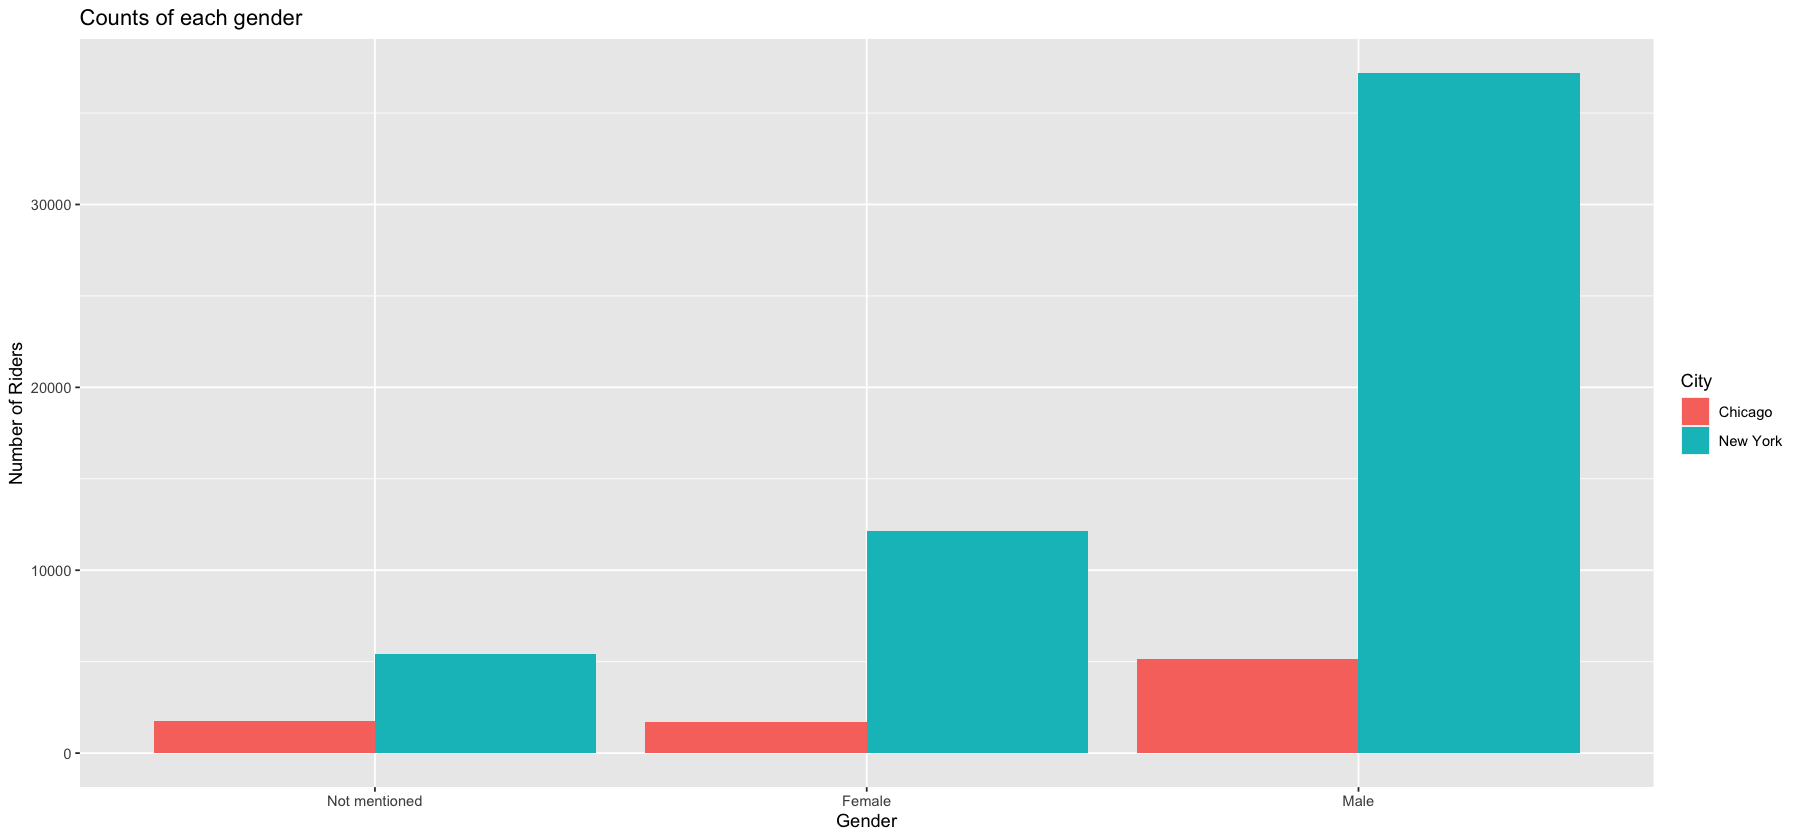

In [104]:
# Visualizing data with ggplot
ggplot(aes(x = Gender, fill = City), data = cd2) +
    geom_bar(position = 'dodge') +
    ggtitle('Counts of each gender') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Rider Count', x = 'Gender')

Overall,there was a gender breakdown of 66.81% Male and 21.90% Female. This stayed fairly consistent when broken down by city. Many more males than females paticipated in the bikeshare program for these two cities, Chicago and New York. I would like to see the gender breakdown for Washington, D.C. but I assume it would be fairly similar.